In [2]:
all_task = [ 'icd infection', 'icd neoplasms', 'icd endocrine', 'icd blood', 'icd mental', 'icd nervous',
         'icd circulatory', 'icd respiratory', 'icd digestive', 'icd genitourinary', 'icd pregnancy',
         'icd skin', 'icd musculoskeletal', 'icd congenital', 'icd ill-defined','icd injury', 'disch 24h', 'disch 48h', 'mort 24h', 'mort 48h',
         'LOS', 'REA', 'ACU',  'dnr 24h', 'dnr 48h', 'cmo 24h', 'cmo 48h']

In [3]:
import torch
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import copy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import torch
import numpy as np
from sklearn.manifold import TSNE
import copy
import warnings
warnings.filterwarnings("ignore")

In [5]:
dataset = '27tasksaddpair'
embedding_list = np.load('./embedding_collect/'+ dataset +'_encoder_output_list_sd.npy',allow_pickle=True)
train_visual = embedding_list[-1]
test_visual = embedding_list[-2]
all_comb = np.concatenate((train_visual,test_visual),axis=0)
# all_comb = train_visual
perf = pd.read_csv('./gain_data/3000addpair/27tasks_validy_clean.csv',sep=' ',header=None).values
mask = pd.read_csv('./gain_data/3000addpair/27tasks_validx_clean.csv',sep=' ',header=None).values
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
perf=perf[new_index]

In [7]:
dataset = '27tasksaddpair'
embedding_list = np.load('./embedding_collect/'+ dataset +'_encoder_output_list_sd.npy',allow_pickle=True)
train_visual = embedding_list[-1]
test_visual = embedding_list[-2]
all_comb = np.concatenate((train_visual,test_visual),axis=0)
# all_comb = train_visual
pred_perf = pd.read_csv('./gain_data/3000addpair/27tasksTAGHOA_clean.csv',sep=' ',header=None).values
mask = pd.read_csv('./gain_data/3000addpair/27tasks_validx_clean.csv',sep=' ',header=None).values
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
TAG_perf=pred_perf[new_index]

In [8]:
import pickle
dataset = '27tasksaddpair'
embedding_list = np.load('./embedding_collect/'+ dataset +'_encoder_output_list_sd.npy',allow_pickle=True)
train_visual = embedding_list[-1]
test_visual = embedding_list[-2]
all_comb = np.concatenate((train_visual,test_visual),axis=0)
with open('./log/27tasksaddpair/pred_pertask_trajactiveper.pkl', "rb") as fp:   
    pred_traj = pickle.load(fp)
with open('./log/27tasksaddpair/mask_pertask_trajactiveper.pkl', "rb") as fp:   
    mask_traj = pickle.load(fp)
pred_perf_2 = pred_traj[-1]
mask = mask_traj[-1]
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
pred_perf_203=pred_perf_2[new_index]

In [9]:
import pickle
dataset = '27tasksaddpair'
embedding_list = np.load('./embedding_collect/'+ dataset +'_encoder_output_list_sd.npy',allow_pickle=True)
train_visual = embedding_list[-1]
test_visual = embedding_list[-2]
all_comb = np.concatenate((train_visual,test_visual),axis=0)
with open('./log/27tasksaddpair/pred_pertask_trajactiveper.pkl', "rb") as fp:   
    pred_traj = pickle.load(fp)
with open('./log/27tasksaddpair/mask_pertask_trajactiveper.pkl', "rb") as fp:   
    mask_traj = pickle.load(fp)
pred_perf = pred_traj[-1]
mask = mask_traj[-1]
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
pred_perf=pred_perf[new_index]

2
(-15.135441504283886, 16.619686727594807)
6
(-24.925889207416784, 26.489691742063908)
11
(-37.88435461068028, 28.15898346034593)
13
(-31.99354096663084, 40.846382241551375)
23
(-40.10545788210574, 33.16729538567053)


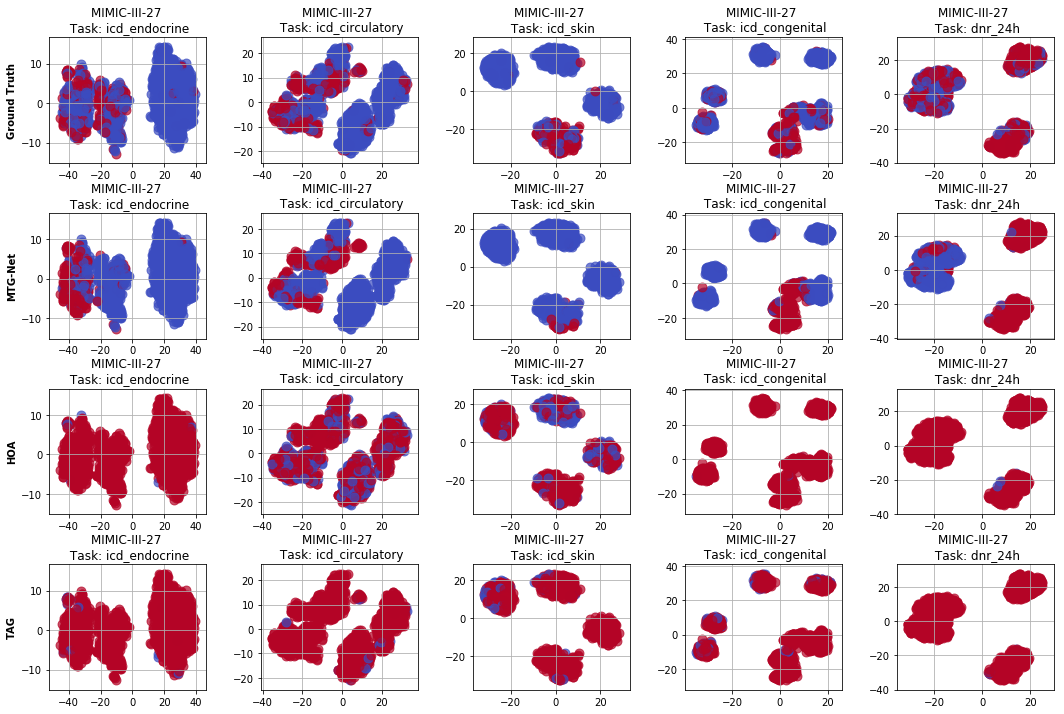

In [9]:
# 201
import copy
_perf = copy.deepcopy(perf)
plt.figure(figsize=(18,12))
figure_idx = 1
for select_task_idx in [2, 6, 11, 13 ,23]:
    print(select_task_idx)
    tmp = 75
    a = 0.7
    _perf = copy.deepcopy(perf)
    _pred_perf = copy.deepcopy(pred_perf)
    _HOA_perf = copy.deepcopy(HOA_perf)
    _TAG_perf = copy.deepcopy(TAG_perf)
    sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
    trainset_idx = []
    testset_idx = []
    for i in range(len(sel_idx)):
        if(sel_idx[i]<len(train_visual)):
            trainset_idx.append(i)
        else:
            testset_idx.append(i)
    selected_comb = all_comb[sel_idx]
    _perf = _perf[sel_idx]
    _pred_perf = _pred_perf[sel_idx]
    _HOA_perf = _HOA_perf[sel_idx]
    _TAG_perf = _TAG_perf[sel_idx]
    _perf = _perf[:,select_task_idx]
    _pred_perf = _pred_perf[:,select_task_idx]
    _HOA_perf = _HOA_perf[:,select_task_idx]
    _TAG_perf = _TAG_perf[:,select_task_idx]
    X = selected_comb[:,select_task_idx,:]
    for i in range(len(_perf)):
        if(_perf[i]>0):
            _perf[i] = 1
        else:
            _perf[i] = -0.5
    for i in range(len(_pred_perf)):
        if(_pred_perf[i]>0):
            _pred_perf[i] = 1
        else:
            _pred_perf[i] = -0.5
    for i in range(len(_HOA_perf)):
        if(_HOA_perf[i]>0):
            _HOA_perf[i] = 1
        else:
            _HOA_perf[i] = -0.5
    for i in range(len(_TAG_perf)):
        if(_TAG_perf[i]>0):
            _TAG_perf[i] = 1
        else:
            _TAG_perf[i] = -0.5
    X_embedded = TSNE(n_components=2,perplexity=tmp, random_state=3).fit_transform(X)
    keys = list(range(len(X)))
    embeddings = X_embedded
    label = keys
    c=_perf
    x = embeddings[:,0]
    y = embeddings[:,1]
    cmap = matplotlib.cm.get_cmap('coolwarm')
    plt.subplot(4,5,figure_idx)
    plt.grid(True)
    plt.title('MIMIC-III-27 \n Task: '+ all_task[select_task_idx])
    for i in range(len(x)):
        plt.scatter(x[i], y[i], alpha=a,color=cmap(c[i]), label=label[i],s=80)
    print(plt.gca().get_ylim())
    if(figure_idx % 5 == 1):
        plt.gca().set_ylabel('Ground Truth',fontweight="bold")
    t_embeddings = X_embedded[trainset_idx]
    v_embeddings = X_embedded[testset_idx]
    _t_perf = _pred_perf[trainset_idx]
    x_t = t_embeddings[:,0]
    y_t = t_embeddings[:,1]
    plt.subplot(4,5,figure_idx+5)
    plt.grid(True)
    plt.title('MIMIC-III-27 \n Task: ' + all_task[select_task_idx])
    for i in range(len(x)):
        plt.scatter(x[i], y[i], alpha=a,color=cmap(_pred_perf[i]), label=label[i],s=80)
    if(figure_idx % 5 == 1):
        plt.gca().set_ylabel('MTG-Net',fontweight="bold")
    plt.subplot(4,5,figure_idx+10)
    plt.grid(True)
    plt.title('MIMIC-III-27 \n Task: ' + all_task[select_task_idx])
    for i in range(len(_HOA_perf)):
        plt.scatter(x[i], y[i], alpha=a,color=cmap(_HOA_perf[i]), label=label[i],s=80)
    if(figure_idx % 5 == 1):
        plt.gca().set_ylabel('HOA',fontweight="bold")
    plt.subplot(4,5,figure_idx+15)
    plt.grid(True)
    plt.title('MIMIC-III-27 \n Task: ' + all_task[select_task_idx])
    for i in range(len(_TAG_perf)):
        plt.scatter(x[i], y[i], alpha=a,color=cmap(_TAG_perf[i]), label=label[i],s=80)
    if(figure_idx % 5 == 1):
        plt.gca().set_ylabel('TAG',fontweight="bold")
    figure_idx = figure_idx + 1
plt.subplots_adjust(wspace=0.35, 
                hspace=0.4)
plt.show()

2
(-15.500913402106175, 17.01961574408328)
6
(-25.573485030838913, 27.14166381307901)
11
(-38.72009367098457, 28.992029153289252)
13
(-32.91532969979091, 41.7375260492068)
23
(-41.03034598007784, 34.05461160590002)


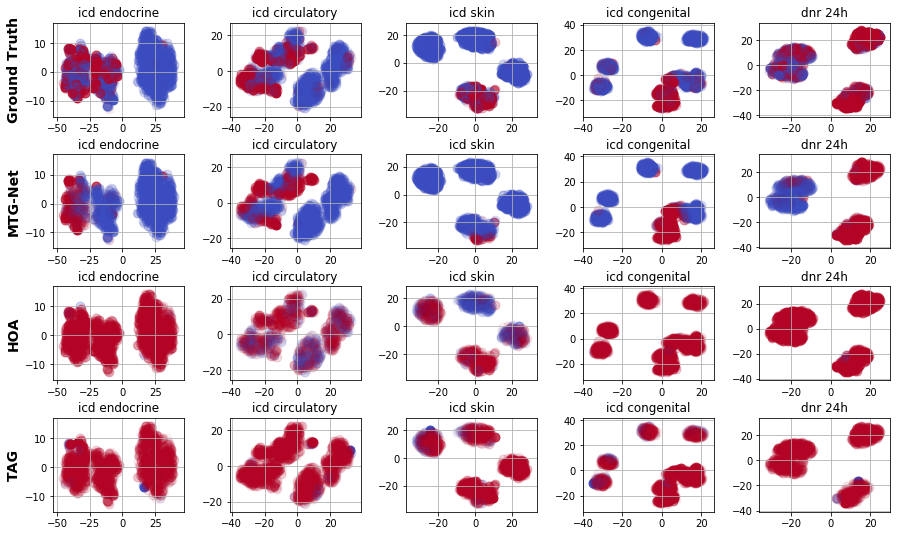

In [10]:
import copy
_perf = copy.deepcopy(perf)
cmap = matplotlib.cm.get_cmap('coolwarm')
a = 0.7
import matplotlib as mpl
perf_max,perf_min = np.max(perf), np.min(perf)
import matplotlib as mpl
fig = plt.figure(figsize=(15,9))
figure_idx = 1
for select_task_idx in [2, 6, 11, 13 ,23]:
    print(select_task_idx)
    tmp = 75
    a = 0.7
    _perf = copy.deepcopy(perf)
    _pred_perf = copy.deepcopy(pred_perf)
    _HOA_perf = copy.deepcopy(HOA_perf)
    _TAG_perf = copy.deepcopy(TAG_perf)
    sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
    trainset_idx = []
    testset_idx = []
    for i in range(len(sel_idx)):
        if(sel_idx[i]<len(train_visual)):
            trainset_idx.append(i)
        else:
            testset_idx.append(i)
    selected_comb = all_comb[sel_idx]
    _perf = _perf[sel_idx]
    _pred_perf = _pred_perf[sel_idx]
    _HOA_perf = _HOA_perf[sel_idx]
    _TAG_perf = _TAG_perf[sel_idx]
    _a = copy.deepcopy(_perf[:,select_task_idx])
    _perf = _perf[:,select_task_idx]
    perf_max,perf_min = np.max(_perf), np.min(_perf)
    TAG_max,TAG_min = np.max(_TAG_perf), np.min(_TAG_perf)
    _a_pred = copy.deepcopy(_pred_perf[:,select_task_idx])
    _pred_perf = _pred_perf[:,select_task_idx]
    _a_HOA = copy.deepcopy(_HOA_perf[:,select_task_idx])
    _HOA_perf = _HOA_perf[:,select_task_idx]
    _a_TAG = copy.deepcopy(_TAG_perf[:,select_task_idx])
    _TAG_perf = _TAG_perf[:,select_task_idx]
    label, pred_label, HOA_label, TAG_label = [] , [] , [] ,[]
    X = selected_comb[:,select_task_idx,:]
    for i in range(len(_perf)):
        if(_perf[i]>=0):
            _perf[i] = 1
            _a[i] = _a[i]/(perf_max+0.00001)
            label.append('positive')
        else:
            _perf[i] = -0.5
            _a[i] = _a[i]/(perf_min-0.00001) + 0.1
            label.append('negative')
        if(_a[i]>0.99):
            _a[i] = 1
    for i in range(len(_pred_perf)):
        if(_pred_perf[i]>=0):
            _pred_perf[i] = 1
            _a_pred[i] = _a_pred[i]/(perf_max+0.00001) + 0.05
            pred_label.append('positive')
        else:
            _pred_perf[i] = -0.5
            _a_pred[i] = _a_pred[i]/(perf_min-0.00001) + 0.1
            pred_label.append('negative')
        if(_a_pred[i]>0.99):
            _a_pred[i] = 1
    for i in range(len(_HOA_perf)):
        if(_HOA_perf[i]>=0):
            _HOA_perf[i] = 1
            _a_HOA[i] = _a_HOA[i]/(perf_max+0.00001)
            HOA_label.append('positive')
        else:
            _HOA_perf[i] = -0.5
            _a_HOA[i] = _a_HOA[i]/(perf_min-0.00001) + 0.1
            HOA_label.append('negative')
        if(_a_HOA[i]>0.99):
            _a_HOA[i] = 1
    for i in range(len(_TAG_perf)):
        if(_TAG_perf[i]>=0):
            _TAG_perf[i] = 1
            TAG_label.append('positive')
            _a_TAG[i] = (_a_TAG[i]+0.0001)/TAG_max
        else:
            _TAG_perf[i] = -0.5
            _a_TAG[i] = (_a_TAG[i]+0.0001)/TAG_min + 0.1
            TAG_label.append('negative')
        if(_a_TAG[i]>=0.99):
            _a_TAG[i] = 1
    # _perf = (_perf-np.min(_perf))/(np.max(_perf)-np.min(_perf))
    # X = all_comb[np.where(all_comb[:,with_task_idx,:].sum(1)!=0)]
    X_embedded = TSNE(n_components=2,perplexity=tmp, random_state=3).fit_transform(X)
    keys = list(range(len(X)))
    embeddings = X_embedded
    label = keys
    c=_perf
    x = embeddings[:,0]
    y = embeddings[:,1]
    cmap = matplotlib.cm.get_cmap('coolwarm')
    # cm.get_cmap('tab20c')(np.linspace(0, 1, len(y)))
    plt.subplot(4,5,figure_idx)
    plt.grid(True)
    plt.title(all_task[select_task_idx])
    for i in range(len(x)):
        plt.scatter(x[i], y[i], alpha=_a[i],color=cmap(c[i]), label=label[i],s=80)
    print(plt.gca().get_ylim())
    if(figure_idx % 5 == 1):
        plt.gca().set_ylabel('Ground Truth',fontweight="bold",fontsize=14)
    t_embeddings = X_embedded[trainset_idx]
    v_embeddings = X_embedded[testset_idx]
    _t_perf = _pred_perf[trainset_idx]
    x_t = t_embeddings[:,0]
    y_t = t_embeddings[:,1]
    plt.subplot(4,5,figure_idx+5)
    plt.grid(True)
    plt.title(all_task[select_task_idx])
    for i in range(len(x)):
        plt.scatter(x[i], y[i], alpha=_a_pred[i],color=cmap(_pred_perf[i]), label=pred_label[i],s=80)
    if(figure_idx % 5 == 1):
        plt.gca().set_ylabel('MTG-Net',fontweight="bold",fontsize=14)
    plt.subplot(4,5,figure_idx+10)
    plt.grid(True)
    plt.title(all_task[select_task_idx])
    for i in range(len(_HOA_perf)):
        plt.scatter(x[i], y[i], alpha=_a_HOA[i],color=cmap(_HOA_perf[i]), label=HOA_label[i],s=80)
    if(figure_idx % 5 == 1):
        plt.gca().set_ylabel('HOA',fontweight="bold",fontsize=14)
    plt.subplot(4,5,figure_idx+15)
    plt.grid(True)
    plt.title(all_task[select_task_idx])
    for i in range(len(_TAG_perf)):
        plt.scatter(x[i], y[i], alpha=_a_TAG[i],color=cmap(_TAG_perf[i]), label=TAG_label[i],s=80)
    if(figure_idx % 5 == 1):
        plt.gca().set_ylabel('TAG',fontweight="bold",fontsize=14)
    figure_idx = figure_idx + 1
plt.subplots_adjust(wspace=0.35, 
                hspace=0.4)
plt.savefig('./embed_visual/mimic27_comparison_alpha.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
    # task_embedd_c =tsne_plot_2d(keys,X_embedded,title='Task Representation, MIMIC-27 Task '+str(select_task_idx),color=_perf,show_legend=False,save_fig = False,anchor_xy = [1.05, 0.9],col=4)